Silhouette Score: 0.4059950406532072


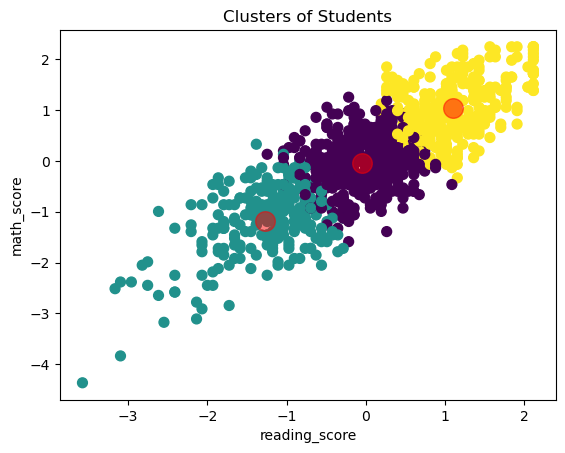

The sample student belongs to cluster: 0


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
df = pd.read_csv('/home/doom_master/Desktop/python/datasets/StudentsPerformance.csv')

features = df[['reading score', 'math score', 'writing score']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)
clusters = kmeans.labels_

silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, s=50,
            cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clusters of Students')
plt.xlabel('reading_score')
plt.ylabel('math_score')
plt.show()
sample_student = pd.DataFrame([[70, 65, 68]], columns=['reading score',
                                                'math score', 'writing score'])
sample_student_scaled = scaler.transform(sample_student)
sample_cluster = kmeans.predict(sample_student_scaled)
print(f"The sample student belongs to cluster: {sample_cluster[0]}")